In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
path = "C:/Users/chuda/Bootcamp_project/Deep Learing/Level2_Problem3/training" # use your path

df_list = [] 
frame = pd.DataFrame()
for file in os.listdir(path):
    df = pd.read_csv(path+'/'+file)
    df_list.append(df) 
frame = pd.concat(df_list) 
dff = frame

dff.head()

,HQ,Country,State_of_outlet,City_of_outlet,Month,Day,Year,Total_Sales
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [3]:
dft = pd.read_excel('test_data (4).xlsx')

In [4]:
dff.dropna(axis = 1, inplace = True)
dft.dropna(axis = 1, inplace = True)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
dff['HQ'] = le.fit_transform(dff['HQ'])
dft['HQ'] = le.transform(dft['HQ'])
dff['Country'] = le.fit_transform(dff['Country'])
dft['Country'] = le.transform(dft['Country'])
dff['City_of_outlet'] = le.fit_transform(dff['City_of_outlet'])
dft['City_of_outlet'] = le.transform(dft['City_of_outlet'])

In [7]:
y = dff['Total_Sales']
X = dff.drop(['Total_Sales','Year'], axis = 1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()

In [12]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],1))

In [16]:
step = len(X.columns)

In [14]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Activation
from keras.activations import relu

Using TensorFlow backend.


In [37]:
model = Sequential()
model.add(LSTM(16,input_shape=(step,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [38]:
history = model.fit(x_train,y_train,epochs=20,batch_size=10000,validation_data=(x_test,y_test),shuffle=False)

Train on 1782967 samples, validate on 764129 samples
Epoch 1/20
1782967/1782967 [==============================] - 23s 13us/step - loss: 3832.1605 - val_loss: 3328.1728
Epoch 2/20
1782967/1782967 [==============================] - 22s 12us/step - loss: 3127.4802 - val_loss: 2960.0831
Epoch 3/20
1782967/1782967 [==============================] - 22s 12us/step - loss: 2819.5092 - val_loss: 2689.7774
Epoch 4/20
1782967/1782967 [==============================] - 21s 12us/step - loss: 2571.1317 - val_loss: 2460.5147
Epoch 5/20
1782967/1782967 [==============================] - 21s 12us/step - loss: 2357.1729 - val_loss: 2260.8229
Epoch 6/20
1782967/1782967 [==============================] - 21s 12us/step - loss: 2169.9467 - val_loss: 2085.5014
Epoch 7/20
1782967/1782967 [==============================] - 22s 12us/step - loss: 2005.3983 - val_loss: 1931.3462
Epoch 8/20
1782967/1782967 [==============================] - 21s 12us/step - loss: 1860.8101 - val_loss: 1796.0310
Epoch 9/20
1782967/

In [39]:
pred = model.predict(x_test)

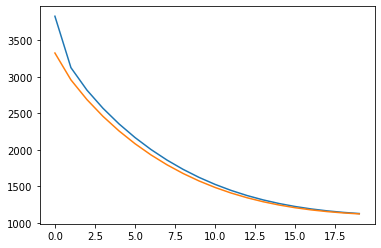

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [41]:
from sklearn import metrics

In [42]:
print(metrics.mean_squared_error(y_test,pred))

1123.3992765159685


In [43]:
print(np.sqrt(metrics.mean_squared_error(y_test,pred)))

33.517148991463586


In [44]:
df_t = dft[X.columns]

In [45]:
x1 = sc.fit_transform(X)
df_t1 = sc.transform(df_t)

In [46]:
df_t1 = df_t1.reshape((df_t1.shape[0],df_t1.shape[1],1))

In [47]:
predd = model.predict(df_t1)

In [48]:
pd.DataFrame(predd, index = dft['ID']).to_csv("Attempt316.csv")